In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import seaborn as sns

In [3]:
data=pd.read_csv("dizi_verisi_95_23.xlsx - Sayfa1 (2).csv")

In [4]:
data.head()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
0,Bir Demet Tiyatro,1995–2007,1995,2007,"0,75",45.0,Comedy,Family,,156.0,...,,,,Necati Akpinar,,NaN,Grup Çagri,,,4
1,Reyting Hamdi,1995–2007,1995,2007,"0,60",40.0,Comedy,,,367.0,...,Murat Boyacioglu,Mesut Ceylan,Nur Özlem Elginöz,Hamdi Alkan,Süleyman Nebioglu,NaN,Engin Özyilmaz,Erdem Özyilmaz,,4
2,Çiçek taksi,1995–2003,1995,2003,"1,00",60.0,Comedy,Drama,,367.0,...,Yilmaz Okumus,Atay Sözer,Hayal Tacirleri,Türker Inanoglu,,NaN,Murat Pinar Ozdemir,Özkan Turgay,,4
3,Bizim Ev,1995,1995,1998,"1,00",60.0,Drama,,,101.0,...,NaN,NaN,NaN,NaN,,NaN,NaN,,,3
4,Boşgezen ve kalfası,1995,1995,1995,"0,75",45.0,Comedy,Fantasy,,8.0,...,,,,Ömer Sahin,,NaN,NaN,,,1


In [5]:
data.tail()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
701,Kirli Sepeti,2023–,2023,2023,"1,00",60.0,Comedy,Drama,,11.0,...,Sertaç Sayin,Nermin Yildirim,,Fatih Aksoy,Merve Girgin,Direnç Aksoy Sidar,Aytaç Özgümüs,Sertaç Özgümüs,,1
702,Ömer,2023–,2023,2023,"2,00",120.0,Drama,,,37.0,...,Yehonatan Indursky,Vural Yasaroglu,Sedef Bayburtluoglu,Onur Güvenatam,Oguzhan Sakaoglu,Aysil Tay,Alp Yenier,,,2
703,Magarsus,2023–,2023,2023,"1,00",60.0,Drama,,,9.0,...,,,,Serkan Cakarer,Yamac Okur,Baris Yildirim,Toygar Isikli,,,2
704,Tozkoparan Iskender Gölge,2023–,2023,2023,"1,00",60.0,Sci-Fi,,,11.0,...,,NaN,,Ferhat Ayan,,NaN,Ömer Faruk Berker,Burcu Memisoglu,Serkan Semiz,3
705,Ruhun Duymaz,2023,2023,2023,"2,00",120.0,Comedy,Drama,,9.0,...,Cem Görgeç,Ayse Kutlu,Ayse Kutlu,Saner Ayar,Omer Lekesiz,NaN,Recby Saatçi,Ercan Saatçi,Ilker Yeter,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dizi Adı English        706 non-null    object 
 1   Referans                706 non-null    object 
 2   Başlama Yılı            706 non-null    int64  
 3   Bitiş Yılı              706 non-null    int64  
 4   Referans-Ortalama Süre  706 non-null    object 
 5   Ortalama Süre           705 non-null    float64
 6   Tür-1                   706 non-null    object 
 7   Tür-2                   706 non-null    object 
 8   Tür-3                   702 non-null    object 
 9   Bölüm Sayısı            706 non-null    float64
 10  Sezon Sayısı            706 non-null    int64  
 11  Oyuncu-1                706 non-null    object 
 12  Oyuncu-2                706 non-null    object 
 13  Oyuncu-3                706 non-null    object 
 14  Oyuncu-4                706 non-null    ob

In [7]:
data.shape

(706, 38)

In [8]:
data=data.drop(['İhraç Edildi Mi?'],axis=1)

In [9]:
data.head()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
0,Bir Demet Tiyatro,1995–2007,1995,2007,"0,75",45.0,Comedy,Family,,156.0,...,,,,Necati Akpinar,,NaN,Grup Çagri,,,4
1,Reyting Hamdi,1995–2007,1995,2007,"0,60",40.0,Comedy,,,367.0,...,Murat Boyacioglu,Mesut Ceylan,Nur Özlem Elginöz,Hamdi Alkan,Süleyman Nebioglu,NaN,Engin Özyilmaz,Erdem Özyilmaz,,4
2,Çiçek taksi,1995–2003,1995,2003,"1,00",60.0,Comedy,Drama,,367.0,...,Yilmaz Okumus,Atay Sözer,Hayal Tacirleri,Türker Inanoglu,,NaN,Murat Pinar Ozdemir,Özkan Turgay,,4
3,Bizim Ev,1995,1995,1998,"1,00",60.0,Drama,,,101.0,...,NaN,NaN,NaN,NaN,,NaN,NaN,,,3
4,Boşgezen ve kalfası,1995,1995,1995,"0,75",45.0,Comedy,Fantasy,,8.0,...,,,,Ömer Sahin,,NaN,NaN,,,1


In [10]:
valuecont=data['Başarı Metrigi'].value_counts()

In [13]:
data.isnull().sum()

Dizi Adı English            0
Referans                    0
Başlama Yılı                0
Bitiş Yılı                  0
Referans-Ortalama Süre      0
Ortalama Süre               1
Tür-1                       0
Tür-2                       0
Tür-3                       4
Bölüm Sayısı                0
Sezon Sayısı                0
Oyuncu-1                    0
Oyuncu-2                    0
Oyuncu-3                    0
Oyuncu-4                    0
Oyuncu-5                    0
Oyuncu-6                    0
Oyuncu-7                    0
Oyuncu-8                    0
Oyuncu-9                    0
Oyuncu-10                   0
Yapımcı Şirket              0
Yayıncı Kuruluşlar-1        0
Yayıncı Kuruluşlar-2        0
Yönetmen                    9
Senarist-1                  0
Senarist-2                 30
Senarist-3                  7
Senarist-4                 29
Senarist-5                  9
Yapımcı-1                  27
Yapımcı-2                   0
Yapımcı-3                 437
Müzisyen-1

In [14]:
mean_value = data['Ortalama Süre'].mean()

data['Ortalama Süre'] = data['Ortalama Süre'].fillna(mean_value)

In [15]:
data.isnull().sum()

Dizi Adı English            0
Referans                    0
Başlama Yılı                0
Bitiş Yılı                  0
Referans-Ortalama Süre      0
Ortalama Süre               0
Tür-1                       0
Tür-2                       0
Tür-3                       4
Bölüm Sayısı                0
Sezon Sayısı                0
Oyuncu-1                    0
Oyuncu-2                    0
Oyuncu-3                    0
Oyuncu-4                    0
Oyuncu-5                    0
Oyuncu-6                    0
Oyuncu-7                    0
Oyuncu-8                    0
Oyuncu-9                    0
Oyuncu-10                   0
Yapımcı Şirket              0
Yayıncı Kuruluşlar-1        0
Yayıncı Kuruluşlar-2        0
Yönetmen                    9
Senarist-1                  0
Senarist-2                 30
Senarist-3                  7
Senarist-4                 29
Senarist-5                  9
Yapımcı-1                  27
Yapımcı-2                   0
Yapımcı-3                 437
Müzisyen-1

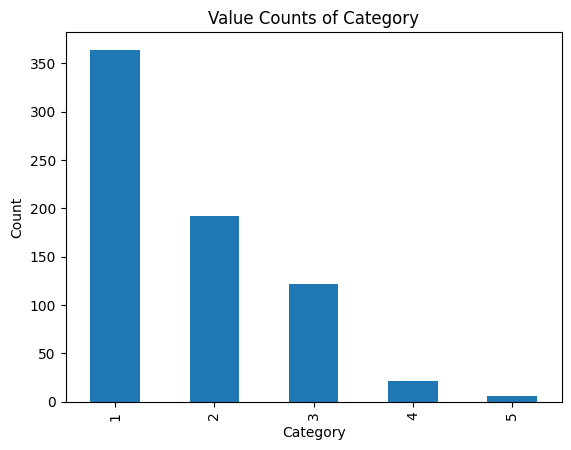

In [11]:
valuecont.plot(kind="bar", xlabel="Category", ylabel="Count", legend=False)
plt.title("Value Counts of Category")
plt.show()

In [16]:
data['Ortalama Süre']=data['Ortalama Süre'].astype(int)

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Tür-1'] = label_encoder.fit_transform(data['Tür-1'])

In [18]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping)

{' Drama': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Biography': 4, 'Comedy': 5, 'Crime': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'History': 10, 'Income': 11, 'Musical': 12, 'Romance': 13, 'Sci-Fi': 14, 'Short': 15}


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Yapımcı Şirket'] = label_encoder.fit_transform(data['Yapımcı Şirket'])

In [20]:
class_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping1)

{' ': 0, '1441 Productions': 1, '3 Nokta Film': 2, 'AC Film': 3, 'AFS Film': 4, 'ANS': 5, 'ANS Production': 6, 'ANS Productions': 7, 'ARC Film': 8, 'ATV': 9, 'Acar Entertainment': 10, 'Acayip Medya': 11, 'Acun Medya': 12, 'Adam Film': 13, 'Akli Film': 14, 'Altinkesit': 15, 'Altioklar Film': 16, 'Arti Film': 17, 'Artistanbul': 18, 'At Yapim': 19, 'Avrupa Film': 20, 'Avsar Film': 21, 'Avsar Yapim': 22, 'Ay Yapim': 23, 'AyNA Yapim': 24, 'BKM': 25, 'BSK Yapim': 26, 'Bando TV': 27, 'Barakuda Film Production': 28, 'Base Productions': 29, 'Base Yapim': 30, 'Baytimur': 31, 'Besiktas Kültür Merkezi (BKM)': 32, 'Bi Yapim': 33, 'Birlesik Heyecanlar': 34, 'Birsel Film': 35, 'BluTV': 36, 'Bosphorus Filmmakers': 37, 'Bosphorus Films': 38, 'Boyut Film': 39, 'Bozdag Film': 40, 'CMYLMZ Fikirsanat': 41, 'CaglarArts Entertainment': 42, 'Calinos Entertainment': 43, 'Cameo Yapim': 44, 'Carthage Plus TV': 45, 'Columbia TriStar International Television': 46, 'D Production': 47, 'D Productions': 48, 'Dada Fil

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Yayıncı Kuruluşlar-1'] = label_encoder.fit_transform(data['Yayıncı Kuruluşlar-1'])

In [22]:
class_mapping2 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping2)

{' ': 0, '1+1': 1, '1+1 Production': 2, '8MM production': 3, 'ANT1': 4, 'ATV': 5, 'AXN White': 6, 'Aksoy Film': 7, 'Ali Sabuncugil Casting Agency': 8, 'Antena 3': 9, 'Atrium Productions': 10, 'Avanti Ciné Vidéo Inc.': 11, 'Avsar Film': 12, 'Ay Yapim': 13, 'BKM': 14, 'Beta Film': 15, 'Beyaz TV': 16, 'BluTV': 17, 'Carthage Plus TV': 18, 'Columbia TriStar Domestic Television': 19, 'Columbia TriStar Television': 20, 'Disney Channel': 21, 'Disney+': 22, 'Divinity': 23, 'Dramax': 24, 'Eccho Rights': 25, 'Eflatun Film': 26, 'El Trece': 27, 'Endemol Shine Turkey': 28, 'Evrensel Filimcilik': 29, 'Express Entertainment': 30, 'Exxen': 31, 'FOXplay': 32, 'Flash TV': 33, 'Fora Film': 34, 'Fourwalled Films': 35, 'Fox Network': 36, 'Fox TV': 37, 'Gain': 38, 'Global Agency': 39, 'Gold Film': 40, 'Hannibal TV': 41, 'IMDb Answers: Help fill gaps in our data': 42, 'Imaj': 43, 'Kanal 1': 44, 'Kanal 7': 45, 'Kanal D': 46, 'Klan TV': 47, 'Medyapim': 48, 'Monte Carlo TV': 49, 'Monte Carlo Televisión - Canal 

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Senarist-1'] = label_encoder.fit_transform(data['Senarist-1'])

In [26]:
class_mapping3 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping3)

{' ': 0, 'Abdullah Akin': 1, 'Abdülhamit Avsar': 2, 'Adem Biyik': 3, 'Ahmet Birsen': 4, 'Ahmet Ruhan Arca': 5, 'Ahmet Saatçioglu': 6, 'Ahmet Yurdakul': 7, 'Aksel Bonfil': 8, 'Alev Alatli': 9, 'Ali Aydin': 10, 'Ali Can Yaras': 11, 'Ali Demirel': 12, 'Ali Dogancay': 13, 'Ali Ercivan': 14, 'Ali Otyam': 15, 'Ali Ulvi Hünkar': 16, 'Alper Alpözgen': 17, 'Alper Caglar': 18, 'Alper Erze': 19, 'Alphan Dikmen': 20, 'Armagan Gülsahin': 21, 'Arzu Birol': 22, 'Aslan Avigdor': 23, 'Asli Ayhan': 24, 'Asli Zengin': 25, 'Asli Zeynep Peker Bozdag': 26, 'Atil Inaç': 27, 'Atilla Atalay': 28, 'Aybars Bora Kahyaoglu': 29, 'Ayberk Cinar': 30, 'Ayhan Sonyürek': 31, 'Aylin Aliveren': 32, 'Ayse Kulin': 33, 'Ayse Kutlu': 34, 'Ayse Sule Bilgiç': 35, 'Ayse Teber': 36, 'Aysin Akbulut': 37, 'Ayça Birkan': 38, 'Ayça Mutlugil': 39, 'Aziz Kedi': 40, 'Banu Kiremitçi Bozkurt': 41, 'Banu Zengin Tak': 42, 'Baris Erdogan': 43, 'Barkin Senüren': 44, 'Basak Angigün': 45, 'Basak Serpan': 46, 'Basak Yazi Odasi': 47, 'Basar Basa

In [33]:
np.random.seed(42)
corr_data=pd.DataFrame({'Başlama Yılı':np.random.rand(5),'Senarist-1':np.random.rand(5),'Başarı Metrigi':np.random.rand(5),'Yayıncı Kuruluşlar-1':np.random.rand(5),'Ortalama Süre':np.random.rand(5),'Yapımcı Şirket':np.random.rand(5),'Tür-1':np.random.rand(5)})
corr_matrix3=data.corr()['Başarı Metrigi']

<ipython-input-33-5605ea585e39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix3=data.corr()['Başarı Metrigi']


In [34]:
print(corr_data)

   Başlama Yılı  Senarist-1  Başarı Metrigi  Yayıncı Kuruluşlar-1  \
0      0.374540    0.155995        0.020584              0.183405   
1      0.950714    0.058084        0.969910              0.304242   
2      0.731994    0.866176        0.832443              0.524756   
3      0.598658    0.601115        0.212339              0.431945   
4      0.156019    0.708073        0.181825              0.291229   

   Ortalama Süre  Yapımcı Şirket     Tür-1  
0       0.611853        0.785176  0.607545  
1       0.139494        0.199674  0.170524  
2       0.292145        0.514234  0.065052  
3       0.366362        0.592415  0.948886  
4       0.456070        0.046450  0.965632  


<function matplotlib.pyplot.show(close=None, block=None)>

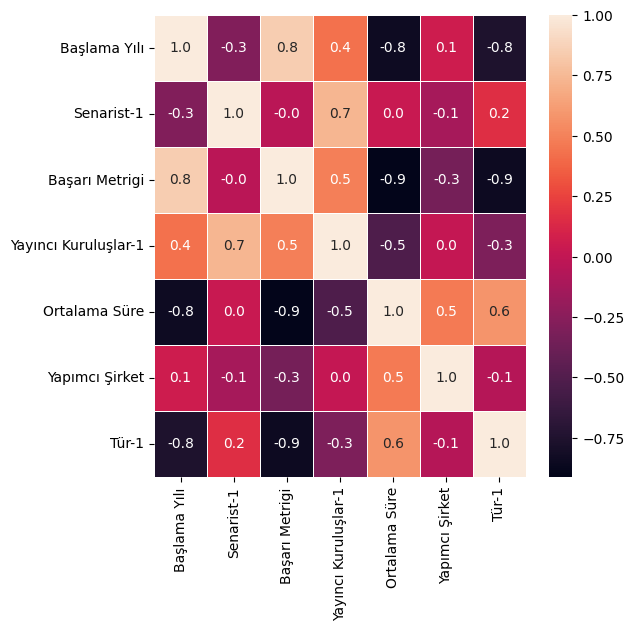

In [36]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_data.corr(),annot=True,fmt=".1f",linewidths=.7)
plt.show

In [37]:
data.head()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
0,Bir Demet Tiyatro,1995–2007,1995,2007,"0,75",45,5,Family,,156.0,...,,,,Necati Akpinar,,NaN,Grup Çagri,,,4
1,Reyting Hamdi,1995–2007,1995,2007,"0,60",40,5,,,367.0,...,Murat Boyacioglu,Mesut Ceylan,Nur Özlem Elginöz,Hamdi Alkan,Süleyman Nebioglu,NaN,Engin Özyilmaz,Erdem Özyilmaz,,4
2,Çiçek taksi,1995–2003,1995,2003,"1,00",60,5,Drama,,367.0,...,Yilmaz Okumus,Atay Sözer,Hayal Tacirleri,Türker Inanoglu,,NaN,Murat Pinar Ozdemir,Özkan Turgay,,4
3,Bizim Ev,1995,1995,1998,"1,00",60,7,,,101.0,...,NaN,NaN,NaN,NaN,,NaN,NaN,,,3
4,Boşgezen ve kalfası,1995,1995,1995,"0,75",45,5,Fantasy,,8.0,...,,,,Ömer Sahin,,NaN,NaN,,,1


In [52]:
droplist=['Referans','Referans-Ortalama Süre','Tür-2','Tür-3','Oyuncu-1','Oyuncu-2','Oyuncu-3','Oyuncu-4','Oyuncu-5','Oyuncu-6','Oyuncu-7','Oyuncu-8','Oyuncu-9','Oyuncu-10','Yapımcı Şirket','Yayıncı Kuruluşlar-1','Yayıncı Kuruluşlar-2','Yönetmen','Senarist-1','Senarist-2','Senarist-3','Senarist-4','Senarist-5','Yapımcı-1','Yapımcı-2','Yapımcı-3','Müzisyen-1','Müzisyen-2']

In [58]:
data1=data.drop(['Sezon Sayısı','Bölüm Sayısı','Müzisyen-3'], axis=1)
data1.head()

,Başlama Yılı,Ortalama Süre,Tür-1,Yapımcı Şirket,Yayıncı Kuruluşlar-1,Senarist-1,Başarı Metrigi
0,1995,45,5,25,74,348,4
1,1995,40,5,91,0,221,4
2,1995,60,5,61,0,287,4
3,1995,60,7,15,0,0,3
4,1995,45,5,93,0,127,1


In [74]:
x=data1[['Başlama Yılı','Yapımcı Şirket','Ortalama Süre','Senarist-1','Yayıncı Kuruluşlar-1','Tür-1']].values
y=data1[['Başarı Metrigi']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")
lr_model.fit(X_train,y_train)
y_head_lr=lr_model.predict(X_test)
lr_score=lr_model.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
print(lr_score)

0.5422535211267606


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4,weights="distance")

knn_model.fit(X_train,y_train)

y_head_knn = knn_model.predict(X_test)

knn_score = knn_model.score(X_test,y_test)
print(knn_score)

0.45774647887323944


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [78]:
new_data=pd.DataFrame({'Başlama Yılı':[2018],'Yapımcı Şirket':[109],'Ortalama Süre':[120],'Tür-1':[0],'Senarist-1':[41],'Yayıncı Kuruluş':[47]})
predictions = knn_model.predict(new_data)
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [79]:
new_data1=pd.DataFrame({'Başlama Yılı':[2022,2021],'Yapımcı Şirket':[23,161],'Ortalama Süre':[45,120],'Tür-1':[0,0],'Senarist-1':[217,329],'Yayıncı Kuruluş':[121,9]})
predictions = lr_model.predict(new_data1)
print(predictions)

[1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
